# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Неполное среднее', 'Среднее специальное', 'Среднее', 'Неоконченное высшее', 'Два и более высших образования', 'Ученая степень'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Состою в браке', 'Разведен(а)', 'Гражданский брак', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Нефтегазовая промышленность', 'Информационные технологии', 'Транспорт', 'СМИ/Реклама/PR-агенства', 'ЧОП/Детективная д-ть', 'Металлургия/Промышленность/Машиностроение', 'Маркетинг', 'Управляющая компания', 'Страхование', 'Развлечения/Искусство', 'Юридические услуги/нотариальные услуги', 'Банк/Финансы', 'Энергетика', 'Сельское хозяйство', 'Салоны красоты и здоровья', 'Ресторанный бизнес/Общественное питание', 'Химия/Парфюмерия/Фармацевтика', 'Недвижимость', 'Строительство', 'Здравоохранение', 'Сборочные производства', 'Коммунальное хоз-во/Дорожные службы', 'Образование', 'Наука', 'Информационные услуги', 'Подбор персонала', 'Другие сферы', 'Торговля', 'Туризм', 'Государственная служба', 'Логистика'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

type(df['PERSONAL_INCOME'][1])

str

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
def checkDataFrameOnMissing(df):
    for i in df.columns:
        if len(df[i][df[i].isnull()]) != 0:
            print('='*110)
            print(i, '\t | \t',
                  df_descr['ОПИСАНИЕ'][df_descr['ПОЛЕ']==i].values[0], '\t | \t',
                  len(df[i][df[i].isnull()]), 'проп.')

In [16]:
checkDataFrameOnMissing(df)

GEN_INDUSTRY 	 | 	 отрасль работы клиента 	 | 	 2713 проп.
GEN_TITLE 	 | 	 должность 	 | 	 2713 проп.
ORG_TP_STATE 	 | 	 форма собственности компании 	 | 	 2713 проп.
ORG_TP_FCAPITAL 	 | 	 отношение к иностранному капиталу 	 | 	 2708 проп.
JOB_DIR 	 | 	 направление деятельности в нутри компании 	 | 	 2713 проп.
TP_PROVINCE 	 | 	 область торговой точки, где клиент брал последний кредит 	 | 	 590 проп.
REGION_NM 	 | 	 регион РФ 	 | 	 2 проп.
WORK_TIME 	 | 	 время работы на текущем месте (в месяцах) 	 | 	 2717 проп.
PREVIOUS_CARD_NUM_UTILIZED 	 | 	 количество уже утилизированных карт ( если пусто - 0)  	 | 	 29533 проп.


In [17]:
df['PREVIOUS_CARD_NUM_UTILIZED']=df['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
checkDataFrameOnMissing(df)

GEN_INDUSTRY 	 | 	 отрасль работы клиента 	 | 	 2713 проп.
GEN_TITLE 	 | 	 должность 	 | 	 2713 проп.
ORG_TP_STATE 	 | 	 форма собственности компании 	 | 	 2713 проп.
ORG_TP_FCAPITAL 	 | 	 отношение к иностранному капиталу 	 | 	 2708 проп.
JOB_DIR 	 | 	 направление деятельности в нутри компании 	 | 	 2713 проп.
TP_PROVINCE 	 | 	 область торговой точки, где клиент брал последний кредит 	 | 	 590 проп.
REGION_NM 	 | 	 регион РФ 	 | 	 2 проп.
WORK_TIME 	 | 	 время работы на текущем месте (в месяцах) 	 | 	 2717 проп.


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [18]:
def checkDataFrameOnCateg(df):
    for i in df.drop(['sample'], axis=1).columns:
        if str(df[i].dtype) == 'object':
            print('='*110)
            print(i, '\t | \t',
                  df_descr['ОПИСАНИЕ'][df_descr['ПОЛЕ'] == i].values[0], '\t | \t',
                  len(set(df[i])), 'кат.')

In [19]:
checkDataFrameOnCateg(df)

EDUCATION 	 | 	 образование 	 | 	 7 кат.
MARITAL_STATUS 	 | 	 семейное положение 	 | 	 5 кат.
GEN_INDUSTRY 	 | 	 отрасль работы клиента 	 | 	 32 кат.
GEN_TITLE 	 | 	 должность 	 | 	 13 кат.
ORG_TP_STATE 	 | 	 форма собственности компании 	 | 	 6 кат.
ORG_TP_FCAPITAL 	 | 	 отношение к иностранному капиталу 	 | 	 3 кат.
JOB_DIR 	 | 	 направление деятельности в нутри компании 	 | 	 11 кат.
FAMILY_INCOME 	 | 	 семейный доход (несколько категорий) 	 | 	 5 кат.
PERSONAL_INCOME 	 | 	 личный доход клиента (в рублях) 	 | 	 373 кат.
REG_ADDRESS_PROVINCE 	 | 	 область регистрации клиента 	 | 	 82 кат.
FACT_ADDRESS_PROVINCE 	 | 	 область фактического пребывания клиента 	 | 	 83 кат.
POSTAL_ADDRESS_PROVINCE 	 | 	 почтовый адрес область 	 | 	 82 кат.
TP_PROVINCE 	 | 	 область торговой точки, где клиент брал последний кредит 	 | 	 71 кат.
REGION_NM 	 | 	 регион РФ 	 | 	 12 кат.
CREDIT 	 | 	 сумма последнего кредита клиента (в рублях) 	 | 	 12911 кат.
FST_PAYMENT 	 | 	 первоначальный взнос (в рублях) 

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [20]:
def preproc_data(df_input, methodFillNa='drop_rows', methodCategoric='dummies', want2drop=[], want2convert=[]):
    # Prepare DATAFRAME to work
    
    df_output = df_input.copy()
    
    # ---- drop ----------------------------------------
    # send array of NAMEs to drop
    for i in want2drop:
        df_output = df_output.drop(want2drop, axis=1)
    
    # ---- convert -------------------------------------
    # send array of NAMEs to convert STRING with ',' to FLOAT with '.'
    for i in want2convert:
        df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
    
    
    # ---- fill na ------------------------------------
    # drop not full rows
    if methodFillNa == 'drop_rows':                   # drop rows
        df_output = df_output.dropna()
    
    # drop not full columns
    elif methodFillNa == 'drop_columns':              # drop columns
        for i in df_output.columns:
            if len(df_output[i][df_output[i].isnull()]) != 0:
                df_output = df_output.drop(i, axis=1)
        
    
    # ---- Categorical --------------------------------
    # Use dummies for categorical variables
    if methodCategoric == 'dummies':
        df_output = pd.get_dummies(df_output)
    
    # Convert to categoricals variables
    elif methodCategoric == 'numbers':
        for i in df_output.columns:
            if str(df_output[i].dtype) == 'object':
                df_output[i] = df_output[i].astype('category')

    
    return df_output

def preproc_checker(df_input_1, df_input_2, replace=True):
    # Check NAMEs between two DATAFRAMES
    
    df_output_1 = df_input_1
    df_output_2 = df_input_2
    
    df_difference_keys_12 = set(df_output_1) - set(df_output_2)
    df_difference_keys_21 = set(df_output_2) - set(df_output_1)
    
    if replace == True:
        if len(df_difference_keys_12) > 0:
            for i in df_difference_keys_12:
                df_output_2[i] = 0

        if len(df_difference_keys_21) > 0:
            for i in df_difference_keys_21:
                df_output_1[i] = 0

        return df_output_1, df_output_2
    elif replace == False:
        print('difference between input_1 and input_2:\n', set(df_output_1) - set(df_output_2))
        print('difference between input_2 and input_1:\n', set(df_output_2) - set(df_output_1))

In [34]:
df_train_preproc = preproc_data(
    df[df['sample'] == 'train'].drop('sample', axis=1),
    methodFillNa='drop_rows',
    methodCategoric='dummies',
    want2drop=['AGREEMENT_RK'],
    want2convert=['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
)

df_test_preproc = preproc_data(
    df[df['sample'] == 'test'].drop('sample', axis=1),
    methodFillNa='drop_rows',
    methodCategoric='dummies',
    want2drop=['AGREEMENT_RK'],
    want2convert=['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
)

df_train_preproc, df_test_preproc = preproc_checker(df_train_preproc, df_test_preproc)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [35]:
X = df_train_preproc.drop('TARGET', axis=1)
y = df_train_preproc['TARGET']

X_test = df_test_preproc.drop('TARGET', axis=1)
y_test = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [36]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X1, X2, y1, y2 = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
dtc.fit(X1, y1)
dtc_predict = dtc.predict(X2)

rfc = RandomForestClassifier()
rfc.fit(X1, y1)
rfc_predict = rfc.predict(X2)

lr = LogisticRegression()
lr.fit(X1, y1)
lr_predict = lr.predict(X2)

In [38]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print('='*20)
print('Accuracy DTC:', accuracy_score(y2, dtc_predict))
print('Accuracy RFC:', accuracy_score(y2, rfc_predict))
print('Accuracy LR:', accuracy_score(y2, lr_predict))
print('='*20)
print('Precision DTC:', precision_score(y2, dtc_predict))
print('Precision RFC:', precision_score(y2, rfc_predict))
print('Precision LR:', precision_score(y2, lr_predict))
print('='*20)
print('Recall DTC:', recall_score(y2, dtc_predict))
print('Recall RFC:', recall_score(y2, rfc_predict))
print('Recall LR:', recall_score(y2, lr_predict))

Accuracy DTC: 0.780643576517
Accuracy RFC: 0.878162613608
Accuracy LR: 0.880127732744
Precision DTC: 0.13982300885
Precision RFC: 0.142857142857
Precision LR: 0.0
Recall DTC: 0.162551440329
Recall RFC: 0.00411522633745
Recall LR: 0.0


Text(0.5,1,'Recall Score')

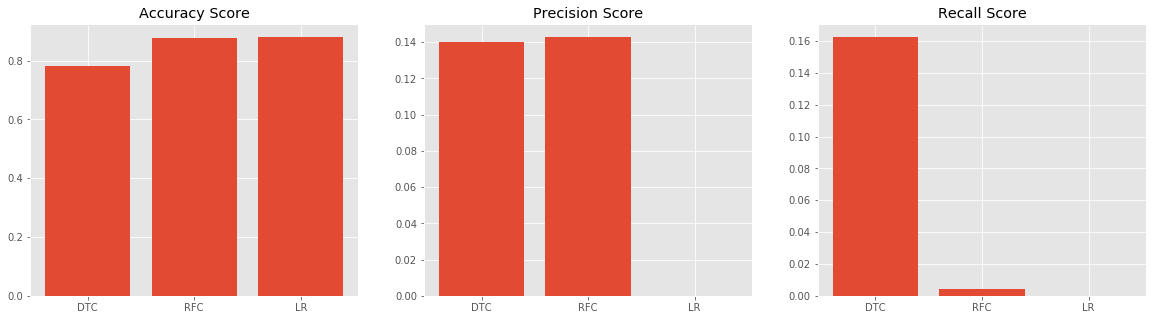

In [39]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.bar(['DTC', 'RFC', 'LR'],
         [accuracy_score(y2, dtc_predict),
          accuracy_score(y2, rfc_predict),
          accuracy_score(y2, lr_predict)])
plt.title('Accuracy Score')

plt.subplot(132)
plt.bar(['DTC', 'RFC', 'LR'],
         [precision_score(y2, dtc_predict),
          precision_score(y2, rfc_predict),
          precision_score(y2, lr_predict)])
plt.title('Precision Score')

plt.subplot(133)
plt.bar(['DTC', 'RFC', 'LR'],
         [recall_score(y2, dtc_predict),
          recall_score(y2, rfc_predict),
          recall_score(y2, lr_predict)])
plt.title('Recall Score')

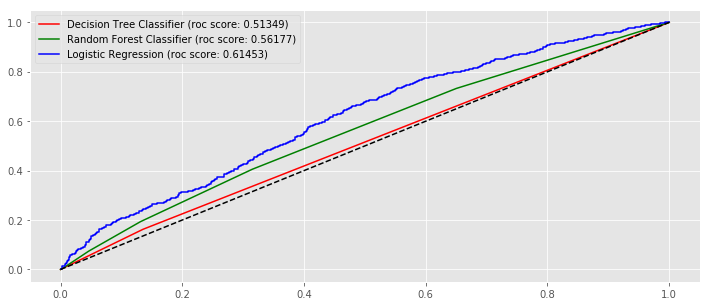

In [40]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
from sklearn.metrics import roc_auc_score, roc_curve

fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y2, dtc.predict_proba(X2)[:, 1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y2, rfc.predict_proba(X2)[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y2, lr.predict_proba(X2)[:, 1])
plt.plot(fpr_dtc, tpr_dtc, 'r',
         fpr_rfc, tpr_rfc, 'g',
         fpr_lr, tpr_lr, 'b',
         [0, 1], [0, 1], '--k')
plt.legend(['Decision Tree Classifier (roc score: ' + str(round(roc_auc_score(y2, dtc.predict_proba(X2)[:, 1]), 5)) + ')',
            'Random Forest Classifier (roc score: ' + str(round(roc_auc_score(y2, rfc.predict_proba(X2)[:, 1]), 5)) + ')',
            'Logistic Regression (roc score: ' + str(round(roc_auc_score(y2, lr.predict_proba(X2)[:, 1]), 5)) + ')'])

In [41]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

### copy from bu [??] ###

cv = 10
    
sc_dtc = cross_val_score(dtc, X2, y2, cv=cv, scoring="roc_auc")
sc_rfc = cross_val_score(rfc, X2, y2, cv=cv, scoring="roc_auc")
sc_lr = cross_val_score(lr, X2, y2, cv=cv, scoring="roc_auc")

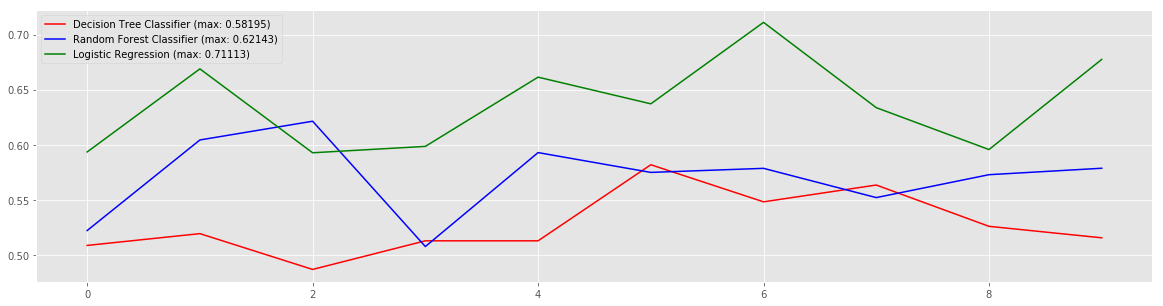

In [42]:
plt.figure(figsize=(20, 5))

plt.plot(list(range(10)), sc_dtc, 'r', 
         list(range(10)), sc_rfc, 'b',
         list(range(10)), sc_lr, 'g')

plt.legend(['Decision Tree Classifier (max: ' + str(round(max(sc_dtc), 5)) + ')',
            'Random Forest Classifier (max: ' + str(round(max(sc_rfc), 5)) + ')',
            'Logistic Regression (max: ' + str(round(max(sc_lr), 5)) + ')'])

/Users/konstantinfreidlin/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


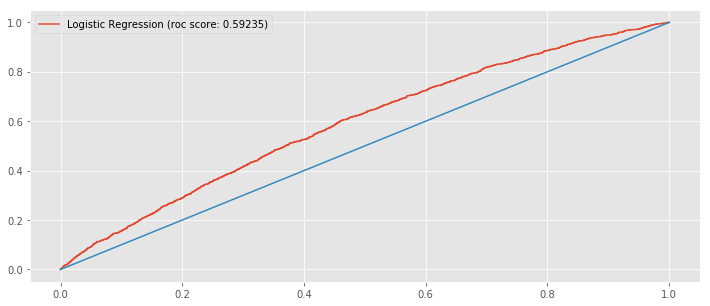

In [43]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

y_hat = lr.predict_proba(X_test)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_hat[:, 1])
plt.plot(fpr_lr, tpr_lr, [0, 1], [0, 1])
plt.legend(['Logistic Regression (roc score: ' + str(round(roc_auc_score(y_test, y_hat[:, 1]), 5)) + ')'])

In [44]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
tsne_repr = tsne.fit_transform(X_test)

CPU times: user 7min 7s, sys: 1min 3s, total: 8min 10s
Wall time: 5min 22s


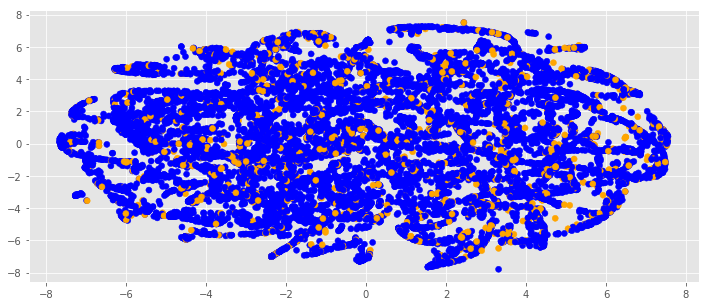

In [45]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=y_test.map({0: 'blue', 1: 'orange'}));